# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [75]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import matplotlib

%matplotlib inline

In [76]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX")
# print(map_box_api)

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [77]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [78]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwellings_sum = to_data.groupby("year").sum()
dwellings_sum

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [79]:
# Save the dataframe as a csv file
dwellings_sum.to_csv("sum_of_dwellings")

In [80]:
# # Helper create_bar_chart function
# def create_bar_chart(data, title, xlabel, ylabel, color):
#     """
#     Create a barplot based in the data argument.
#     """

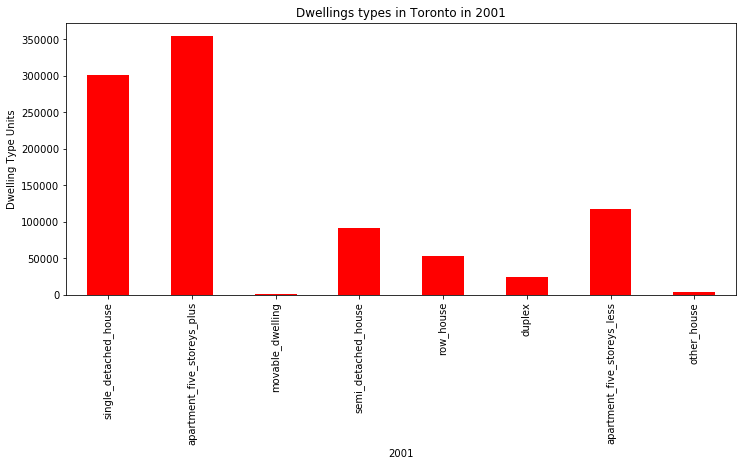

In [115]:
# Create a bar chart per year to show the number of dwelling types
dwellings_type = dwellings_sum.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])

# Bar chart for 2001
data_2001 = dwellings_type.iloc[0].plot.bar(figsize=[12,5], 
                                            color = "red",
                                            title="Dwellings types in Toronto in 2001"
                                            )
plt.xlabel("2001")
plt.ylabel("Dwelling Type Units")
data_2001

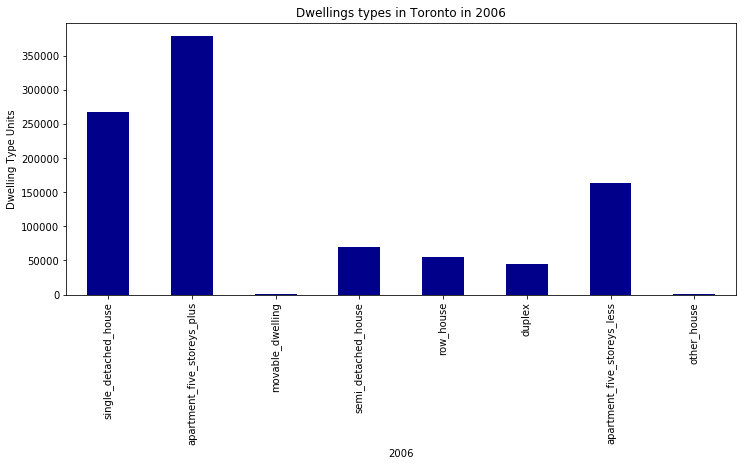

In [108]:
# Bar chart for 2006
data_2006 = dwellings_type.iloc[1].plot.bar(figsize=[12,5], color="darkblue", title="Dwellings types in Toronto in 2006")
plt.xlabel("2006")
plt.ylabel("Dwelling Type Units")
data_2006

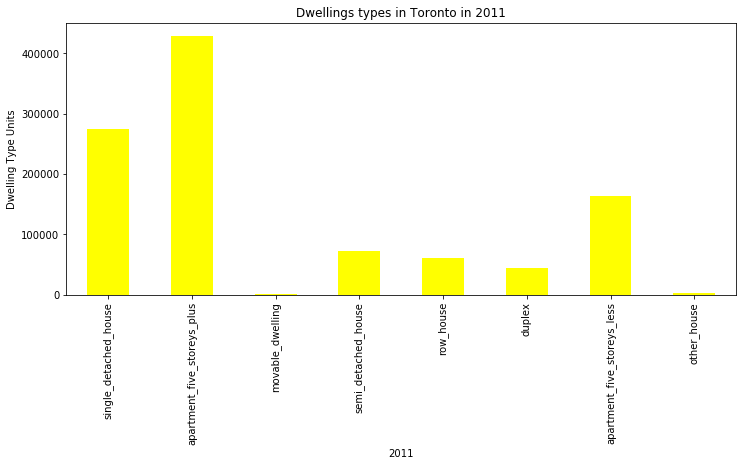

In [109]:
# Bar chart for 2011
data_2011 = dwellings_type.iloc[2].plot.bar(figsize=[12,5], color = "yellow", title="Dwellings types in Toronto in 2011")
plt.xlabel("2011")
plt.ylabel("Dwelling Type Units")
data_2011

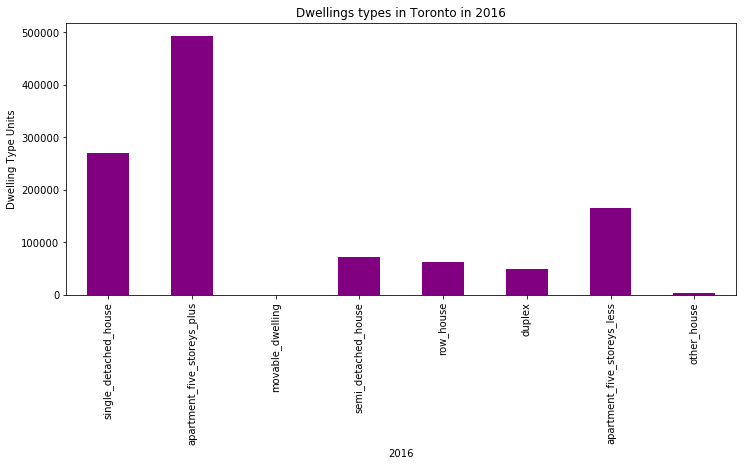

In [110]:
# Bar chart for 2016
data_2016 = dwellings_type.iloc[3].plot.bar(figsize=[12,5], color = "purple", title="Dwellings types in Toronto in 2016")

plt.xlabel("2016")
plt.ylabel("Dwelling Type Units")
data_2016

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [85]:
# Calculate the average monthly shelter costs for owned and rented dwellings
dwellings_mean = to_data.groupby("year").mean()
dwellings_mean
avg_monthly_shelter_costs = dwellings_mean[["shelter_costs_owned", "shelter_costs_rented"]]
avg_monthly_shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [86]:
# # Helper create_line_chart function
# def create_line_chart(data, title, xlabel, ylabel, color):
#     """
#     Create a line chart based in the data argument.
#     """

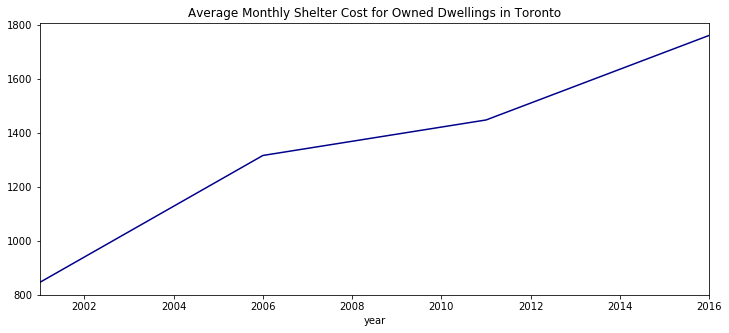

In [87]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
plot_owned_dwellings = avg_monthly_shelter_costs["shelter_costs_owned"].plot.line(figsize=[12,5], 
                                                                                  color="darkblue", 
                                                                                  title="Average Monthly Shelter Cost for Owned Dwellings in Toronto")
plot_owned_dwellings

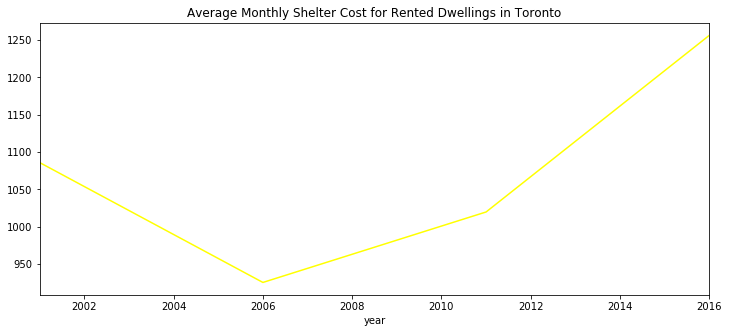

In [111]:
# Line chart for rented dwellings
plot_rented_dwellings = avg_monthly_shelter_costs["shelter_costs_rented"].plot.line(figsize=[12,5], 
                                                                                    color="yellow",
                                                                                    title="Average Monthly Shelter Cost for Rented Dwellings in Toronto")
plot_rented_dwellings

## Average House Value per Year

In [89]:
# Calculate the average house value per
avg_housing_value = dwellings_mean["average_house_value"]
avg_housing_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

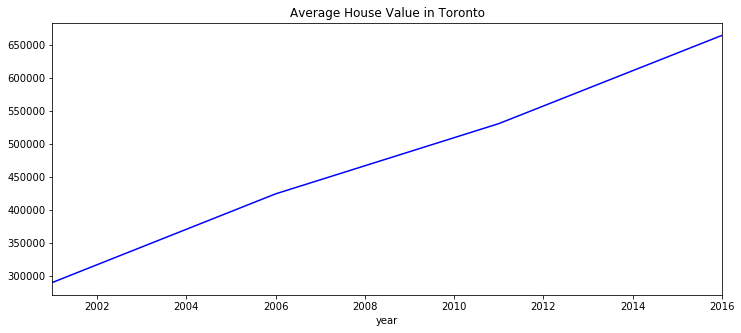

In [90]:
# Plot the average house value per year as a line chart
avg_housing_value.plot.line(figsize=[12,5], 
                            color="blue",
                            title="Average House Value in Toronto")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [91]:
# Create a new DataFrame with the mean house values by neighbourhood per year
neighbourhood_df = to_data.groupby(["year", "neighbourhood"]).mean()
neighbourhood_mean_house_value = neighbourhood_df[["average_house_value"]]
neighbourhood_mean_house_value.head()

average_house_value
year neighbourhood                                    
2001 Agincourt North                            200388
     Agincourt South-Malvern West               203047
     Alderwood                                  259998
     Annex                                      453850
     Banbury-Don Mills                          371864

In [92]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
neighbourhood_mean_house_value.hvplot.line("year", groupby="neighbourhood", width= 500).opts(yformatter="%.0f")


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean number of dwelling types for each year and neighbourhood.

In [93]:
# Fetch the data of all dwelling types per year
to_data.head(10)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018


In [94]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwellings_types_neighbourhood = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])
dwellings_types_neighbourhood.hvplot.bar("year", groupby="neighbourhood", width= 700, height = 500, rot=90)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [95]:
# Getting the data from the top 10 expensive neighbourhoods
expensive_neighbourhood = to_data.groupby("neighbourhood").mean()

expensive_neighbourhood.sort_values("average_house_value", ascending= False, inplace=True)
top_10_expensive_neighbourhood = expensive_neighbourhood.iloc[0:10]
top_10_expensive_neighbourhood

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50
Casa Loma,916.25,2310.00,0.00,288.75,201.25,162.5,1192.50,2.50,981064.25,1873.75,1547.75
Bedford Park-Nortown,4865.00,1981.25,0.00,43.75,57.50,287.5,1275.00,88.75,930415.25,1786.75,1255.00
Forest Hill North,1488.75,3392.50,0.00,12.50,16.25,82.5,402.50,1.25,851680.50,1722.75,1245.50
Kingsway South,2326.25,576.25,0.00,66.25,48.75,20.0,336.25,2.50,843234.25,1736.75,1622.00


In [96]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10_expensive_neighbourhood.hvplot.bar(x = "neighbourhood", 
                                          y = "average_house_value", 
                                          rot=90, height= 500,
                                         title= "Top 10 Expensive Neighbourhoods in Toronto").opts(yformatter="%.0f")

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Cost Analysis

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [97]:
plotly_figure = to_data.reset_index()
plotly_figure.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


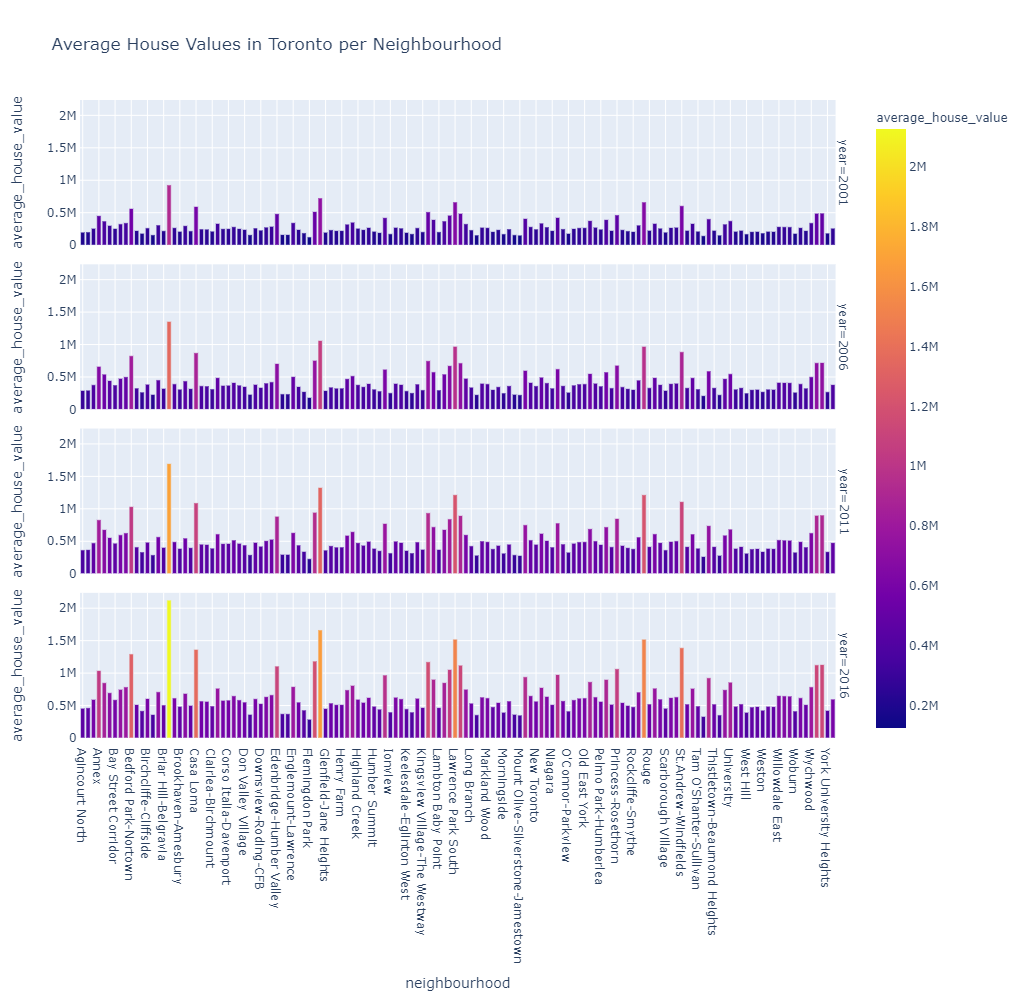

In [98]:
row_facet = px.bar(plotly_figure, 
                       x = "neighbourhood", 
                       y = "average_house_value",
                       facet_row = "year",
                       title = "Average House Values in Toronto per Neighbourhood",
                       height = 1000,
                       width = 1300,
                       color = "average_house_value")
row_facet

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [99]:
# Fetch the data from all expensive neighbourhoods per year.
expensive_neighbourhoods_yearly_df = to_data.reset_index()
# Selecteing top-10 most expensive neighbourhoods from each year
expensive_neighbourhoods_yearly= expensive_neighbourhoods_yearly_df.sort_values(
                                                                        ['year', 
                                                                         'average_house_value'
                                                                        ], 
                                                                            ascending=False).groupby('year').head(10)

sunburst_chart = expensive_neighbourhoods_yearly.sort_values(["year", "average_house_value"])
sunburst_chart.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
137,2001,Yonge-St.Clair,670,3625,0,410,200,280,1020,25,494098,1091,1351
64,2001,Kingsway South,2370,260,0,65,45,0,340,10,512334,1362,1340
43,2001,Forest Hill North,1565,3380,0,10,0,0,485,5,517466,940,1428
9,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491
21,2001,Casa Loma,1035,1700,0,415,190,185,1090,5,596077,1241,1500


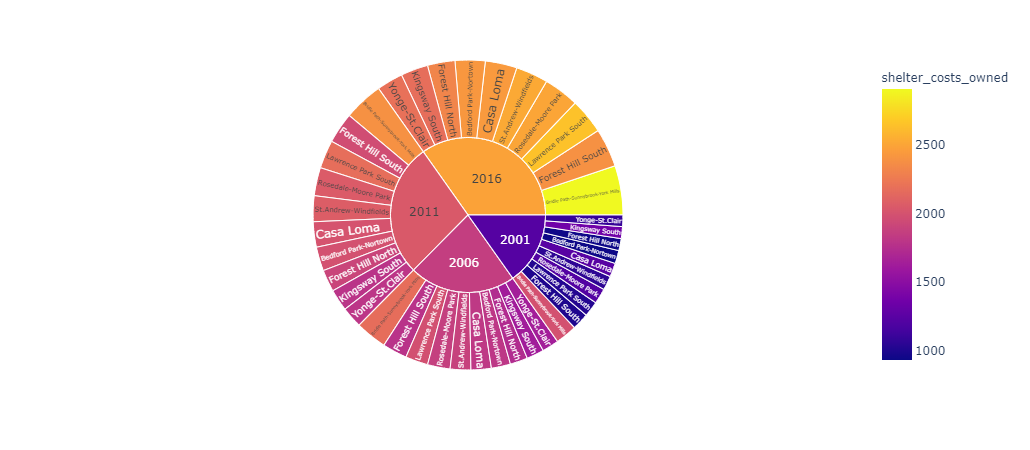

In [100]:
# Create the sunburst chart
sunburst_figure = px.sunburst(sunburst_chart, 
                              path =["year", "neighbourhood"], 
                              values = "average_house_value",
                              hover_data=["shelter_costs_owned","shelter_costs_rented"],
                              color=("shelter_costs_owned")
                              )

# To change color of the figure, use the command in the above code --> color_continuous_scale='Blues'
sunburst_figure

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [101]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [102]:
# Calculate the mean values for each neighborhood
mean_value_neighbourhood = to_data.groupby("neighbourhood").mean()
mean_value_neighbourhood.reset_index(inplace=True)
mean_value_neighbourhood.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [103]:
# Join the average values with the neighbourhood locations

combined_df = df_neighbourhood_locations.merge(mean_value_neighbourhood, on = "neighbourhood", how = "outer")
combined_df.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [113]:
# Create a scatter mapbox to analyze neighbourhood info
map = px.scatter_mapbox(
    combined_df,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    zoom=4,
    title = "Average House Values in Toronto",
    color_continuous_scale=px.colors.cyclical.IceFire,
    hover_name = "neighbourhood",
    hover_data = ["single_detached_house",
                  "apartment_five_storeys_plus",
                  "movable_dwelling",
                  "semi_detached_house",
                  "row_house",
                  "duplex",
                  "apartment_five_storeys_less",
                  "other_house"]
)

# Display the map
map.show()